#데이터 불러오기#

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle/input/dogs-vs-cats'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/kaggle/input/dogs-vs-cats/sampleSubmission.csv
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/test1.zip
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/train.zip
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/3.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/2.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/1.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/7.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/9.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/4.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/8.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/5.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/10.jpg
/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0/6.jpg


In [8]:
import zipfile

train_zip = zipfile.ZipFile('/content/drive/MyDrive/kaggle/input/dogs-vs-cats/train.zip')
train_zip.extractall("/kaggle/working/dataset")
train_zip.close()

test_zip = zipfile.ZipFile('/content/drive/MyDrive/kaggle/input/dogs-vs-cats/test1.zip')
test_zip.extractall("/kaggle/working/dataset")
test_zip.close()

카테고리 분류

In [9]:
filenames = os.listdir('/kaggle/working/dataset/train')

categories=[]
for train_filename in filenames:         #개 사진은1, 고양이사진은0으로 저장
    category=train_filename.split(".")[0]
    if category =="dog":
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame(
    {"filename":filenames,
    "category":categories}
)        
df

,filename,category
0,cat.9402.jpg,0
1,cat.2156.jpg,0
2,dog.3070.jpg,1
3,cat.286.jpg,0
4,dog.10072.jpg,1
...,...,...
24995,dog.5655.jpg,1
24996,dog.4988.jpg,1
24997,cat.2249.jpg,0
24998,dog.5645.jpg,1


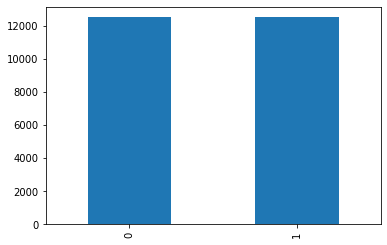

In [10]:
%matplotlib inline
df['category'].value_counts().plot.bar()

데이터 확인

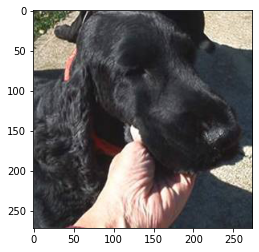

In [11]:
%matplotlib inline
import random
from tensorflow.keras.utils import load_img
sample = random.choice(filenames)#랜덤한 사진을 하나 가지고옴
image = load_img('/kaggle/working/dataset/train/'+sample)
plt.imshow(image)

딥러닝 모델구축

In [1]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL=3 #색상이미지이므로 채널은 3으로 지정

In [2]:
from keras.models import Sequential
from keras.layers import *
A1model = Sequential()
A1model.add(Conv2D(32, kernel_size=(3,3), input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL), activation='relu'))
A1model.add(Conv2D(64, (3,3), activation='relu'))
A1model.add(MaxPooling2D(pool_size=(2,2)))
A1model.add(Dropout(0.25))
A1model.add(Flatten())
A1model.add(Dense(128, activation='relu'))
A1model.add(Dropout(0.5))
A1model.add(Dense(2, activation='softmax'))

In [12]:
A1model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
A1model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               31490176  
                                                        

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
#reduceLRONplateau :plateau 는 정체기란 뜻으로 모델의 정확도가 향상되지 않는 경우 ㅡ learning rate (lr) 을 줄여주는 클래스
earlystop = EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(
                        monitor= "val_accuracy", 
                        patience = 2, 
                        factor = 0.5, 
                        min_lr=0.0001,
                        verbose=1)
                        
callbacks = [earlystop, learning_rate_reduction]

vgg16구현(A2모델)

In [14]:
vggmodel = Sequential()#일반적인 vgg모델에서 입력되는 이미지의 크기를 244*244에서 128*128로, 출력값을 2로 바꾸고, BatchNormalization을 하는 과정을 추가했음.
vggmodel.add(Conv2D(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(BatchNormalization())
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Flatten())
vggmodel.add(Dense(units=4096,activation="relu"))
vggmodel.add(Dense(units=4096,activation="relu"))
vggmodel.add(Dense(units=2, activation="softmax"))
#총 16개의 층

In [15]:
vggmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
vggmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                      

In [16]:
df['category']=df['category'].replace({0:'cat',1:"dog"}) # 이미지 제너레이터에서 class_mode = "categorical"로 지정하기 위해 컬럼 카테고리를 스트링으로 변경함.

학습셋을 학습셋과 검증셋으로 나누기



In [17]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df , test_size=0.2, random_state= 42)#검증셋 크기는 테스트셋의 20퍼센트

train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [18]:
train_df['category'].value_counts()

cat    10001
dog     9999
Name: category, dtype: int64

In [19]:
validate_df['category'].value_counts()

dog    2501
cat    2499
Name: category, dtype: int64

이미지 제네레이터:
이미지 제네레이터란 이미지를 학습시킬 때 학습데이터의 양이 적을 경우 학습데이터를 조금씩 변형시켜서 학습데이터의 양을 늘리는 방식중에 하나이다.

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

#학습데이터의 제너레이터 설정 
train_datagen=ImageDataGenerator(
        rotation_range=15, #회전각도를 30도이내의 무작위 각도로 변경함
        rescale=1./255,#속성값을 0과 1사이로 변경
        shear_range=0.1, #강도에따라 층을 밀리게함
        zoom_range=0.2, #범위안 무작위 수치만큼 줌을함
        horizontal_flip=True,#무작위로 가로로 뒤집는다
        width_shift_range=0.1, #좌우로 이동가능한 비율
        height_shift_range=0.1) #상하로 이동가능한 비율
        
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    '/kaggle/working/dataset/train',
    x_col = "filename", 
    y_col = "category",
    target_size = IMAGE_SIZE, #이미지의 사이즈 IMAGE_SIZE
    class_mode = "categorical", #Y값의 변화방법
    batch_size = batch_size )

validate_datagen=ImageDataGenerator(rescale=1./255)
# 검증이미지는 검증을하기위한 것이므로 사진 그대로를 씀.

validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    '/kaggle/working/dataset/train',
    x_col= "filename",
    y_col= "category",
    target_size = IMAGE_SIZE,#IMAGE_SIZE
    class_mode = "categorical",
    batch_size = batch_size )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


샘플 데이터 확인

In [ ]:
example_df=train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,category
0,cat.4701.jpg,cat


샘플데이터에 대해 제네레이터 진행

In [ ]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    '/kaggle/working/dataset/train',
                    x_col = "filename",
                    y_col = "category",
                    target_size = IMAGE_SIZE,#IMAGE_SIZE
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


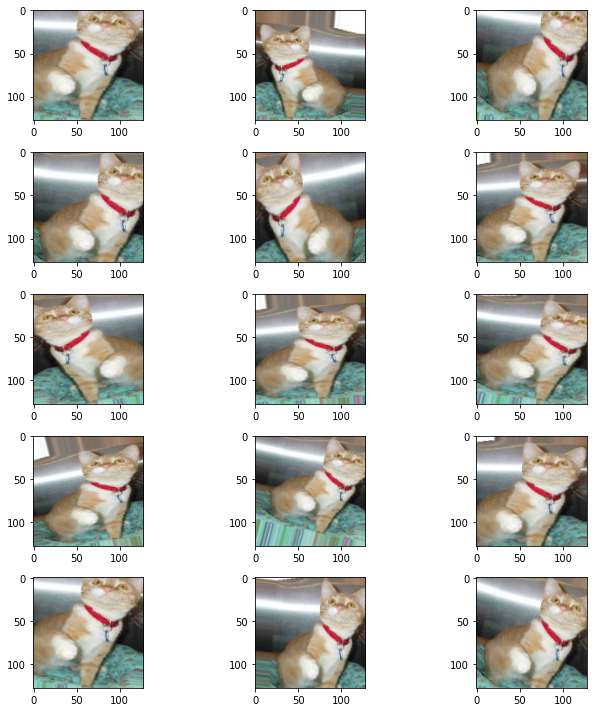

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs = 80

history = A1model.fit_generator(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,
    callbacks = callbacks,
)

# 모델 저장 
A1model.save("A1model.h5")

Epoch 1/80


<ipython-input-34-e1449d7a5291>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = A1model.fit_generator(


1333/1333 [==============================] - 144s 108ms/step - loss: 0.6597 - accuracy: 0.6108 - val_loss: 0.5807 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 2/80
1333/1333 [==============================] - 144s 108ms/step - loss: 0.6054 - accuracy: 0.6784 - val_loss: 0.5441 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 3/80
1333/1333 [==============================] - 144s 108ms/step - loss: 0.5814 - accuracy: 0.6976 - val_loss: 0.5391 - val_accuracy: 0.7339 - lr: 0.0010
Epoch 4/80
1333/1333 [==============================] - 143s 107ms/step - loss: 0.5604 - accuracy: 0.7186 - val_loss: 0.5053 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 5/80
1333/1333 [==============================] - 143s 107ms/step - loss: 0.5433 - accuracy: 0.7314 - val_loss: 0.5192 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 6/80
1333/1333 [==============================] - ETA: 0s - loss: 0.5339 - accuracy: 0.7354
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 [=====================

In [ ]:
epochs = 80

history = vggmodel.fit_generator(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,
    callbacks = callbacks,
)

# 모델 저장 
vggmodel.save("vgg model.h5")

Epoch 1/80


<ipython-input-24-c5a3ab3dfea6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = vggmodel.fit_generator(


1333/1333 [==============================] - 135s 100ms/step - loss: 0.9254 - accuracy: 0.5681 - val_loss: 0.7471 - val_accuracy: 0.5083 - lr: 0.0010
Epoch 2/80
1333/1333 [==============================] - 132s 99ms/step - loss: 0.6913 - accuracy: 0.5745 - val_loss: 0.8030 - val_accuracy: 0.5483 - lr: 0.0010
Epoch 3/80
1333/1333 [==============================] - 132s 99ms/step - loss: 0.6859 - accuracy: 0.5727 - val_loss: 0.7111 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 4/80
1333/1333 [==============================] - 132s 99ms/step - loss: 0.6333 - accuracy: 0.6381 - val_loss: 0.8837 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 5/80
1333/1333 [==============================] - 132s 99ms/step - loss: 0.5861 - accuracy: 0.6867 - val_loss: 0.5529 - val_accuracy: 0.7153 - lr: 0.0010
Epoch 6/80
1333/1333 [==============================] - 132s 99ms/step - loss: 0.5563 - accuracy: 0.7170 - val_loss: 0.5629 - val_accuracy: 0.7385 - lr: 0.0010
Epoch 7/80
1333/1333 [============================

테스트데이터 준비

In [21]:
filenames = os.listdir('/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0')

test_df=pd.DataFrame( {"filename":filenames} )      
test_df

nbsamples=test_df.shape[0]

In [22]:
test_datagen=ImageDataGenerator(rescale=1./255)
# 테스트 이미지이므로 사진은 그대로두고 rescale만 진행            
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    '/content/drive/MyDrive/kaggle/input/dogs-vs-cats/Test0',
    x_col= "filename",
    y_col= None,
    target_size = IMAGE_SIZE,
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 10 validated image filenames.


예측하기

In [3]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/kaggle/vgg model.h5')#상황에 따라 코드를 살짝씩 바꿈

In [24]:
predict=model.predict_generator(test_generator, 
                                steps=nbsamples/10, 
                                callbacks=callbacks,
                                 verbose=1)

test_df['category']=np.argmax(predict, axis=1)

<ipython-input-24-141a545059ea>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model.predict_generator(test_generator,


1/1 [==============================] - 8s 8s/step


In [25]:
#테스트샘플을 랜텀으로추출해서 확인
test_df['category']=test_df['category'].replace({0:'cat',1:"dog"})#0은 고양이로, 1은 개로 카테고리를 바꿈
ex_df=test_df.sample(n=1).reset_index(drop=True)
ex_df

,filename,category
0,5.jpg,cat


In [26]:
ex_generator = test_datagen.flow_from_dataframe(
                    ex_df,
                    '/kaggle/working/dataset/test1',
                    x_col = "filename",
                    y_col = None,
                    target_size = IMAGE_SIZE,
                    class_mode = None)

Found 1 validated image filenames.


In [27]:
#테스트샘플을 불러옴
test_sample=list(ex_df.filename)

sample = ""
for test in test_sample:
    sample += test

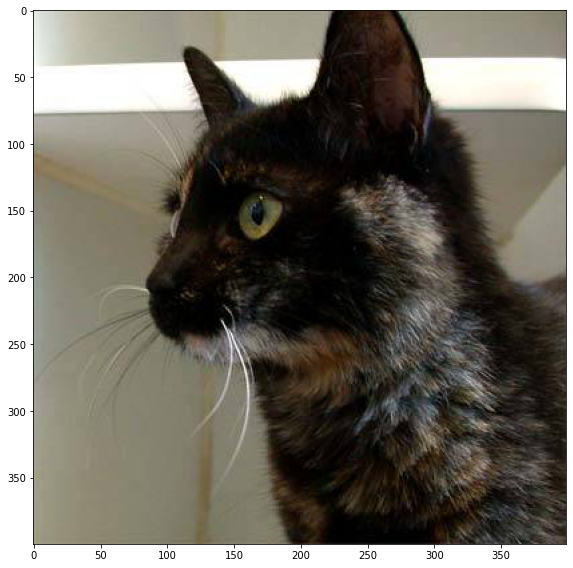

In [28]:
image = load_img('/kaggle/working/dataset/test1/'+sample)
plt.figure(figsize=(8,8))
plt.imshow(image)

plt.tight_layout()
plt.show()

submission파일로 내보내기

In [29]:
sampleSubmission=pd.read_csv('/content/drive/MyDrive/kaggle/input/dogs-vs-cats/'+"sampleSubmission.csv", dtype="object")
sampleSubmission

index=[]
for filename in test_df.filename:
    li=filename.split(".")[0]
    index.append(li)
    
test_df["id"]=index

final=test_df.merge(sampleSubmission)[['id','category']]
final['id']=final['id'].astype("int64")
final=final.sort_values("id")

final.rename({'category':"label"},axis='columns').to_csv("Submission.csv", index=False)

In [30]:
df1=pd.read_csv('/content/Submission.csv')
df1

,id,label
0,1,dog
1,2,dog
2,3,dog
3,4,cat
4,5,cat
5,6,cat
6,7,dog
7,8,cat
8,9,dog
9,10,cat
